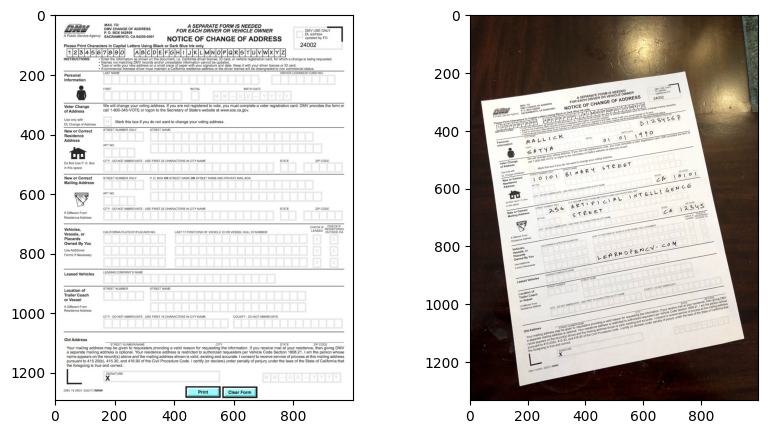

In [80]:
import cv2
import matplotlib.pyplot as plt

img_template = cv2.imread('form.jpg')

img_need_aligned = cv2.imread('scanned-form.jpg')


plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(img_template, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_need_aligned, cv2.COLOR_BGR2RGB))


In [81]:
form = cv2.cvtColor(img_template, cv2.COLOR_BGR2GRAY)
s_form = cv2.cvtColor(img_need_aligned, cv2.COLOR_BGR2GRAY)

In [84]:
MAX_FEATURES = 200

orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(form, None)
keypoints2, descriptors2 = orb.detectAndCompute(s_form, None)

In [85]:
print(descriptors1.shape)
print(keypoints1[0].pt)

(200, 32)
(63.0, 203.0)


In [103]:
import numpy as np

GOOD_MATCH_PERCENT = 0.1


# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)
# Remove not so good matches
numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
matches = matches[:numGoodMatches]

# Draw top matches
imMatches = cv2.drawMatches(img_template, keypoints1, img_need_aligned, keypoints2, matches, None)
cv2.imwrite("matches.jpg", imMatches)

# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

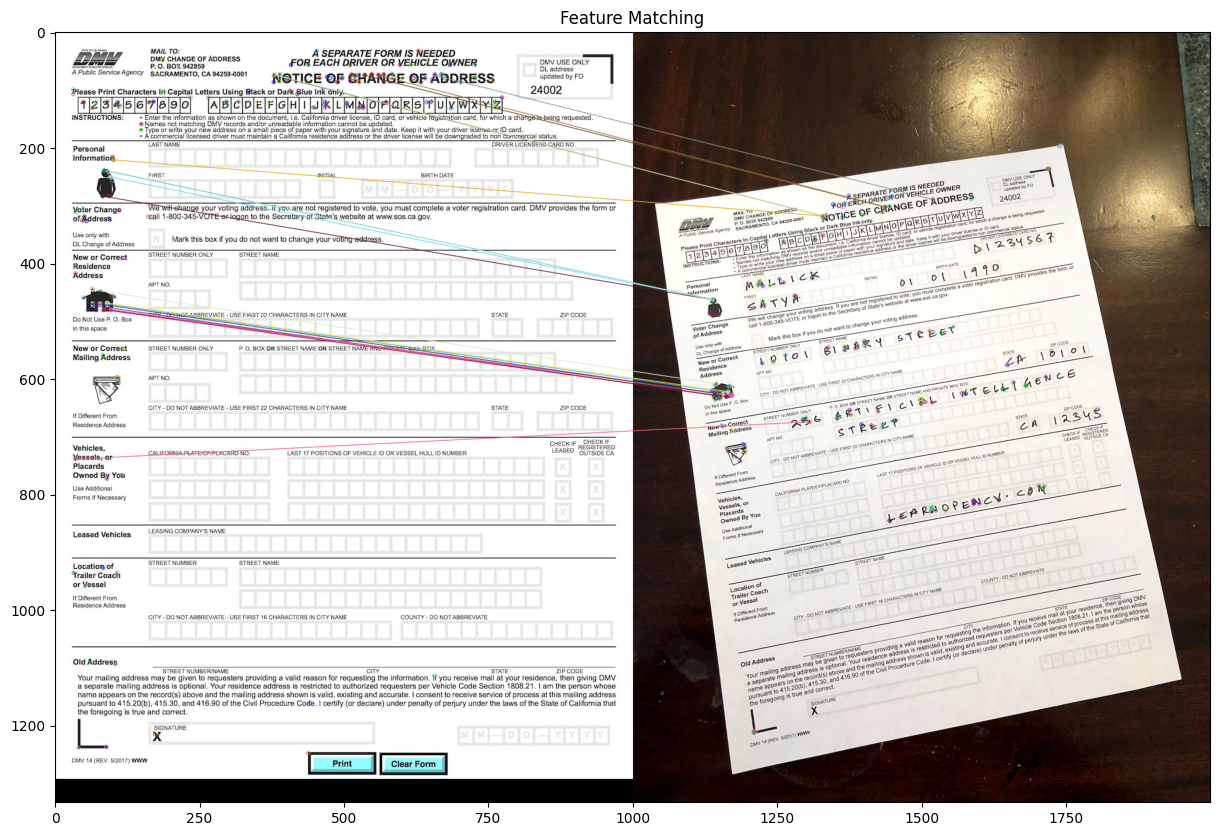

In [104]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(imMatches, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching')
plt.show()


In [105]:
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

In [106]:
height, width, channels = img_template.shape
im2Reg = cv2.warpPerspective(img_need_aligned, h, (width, height))

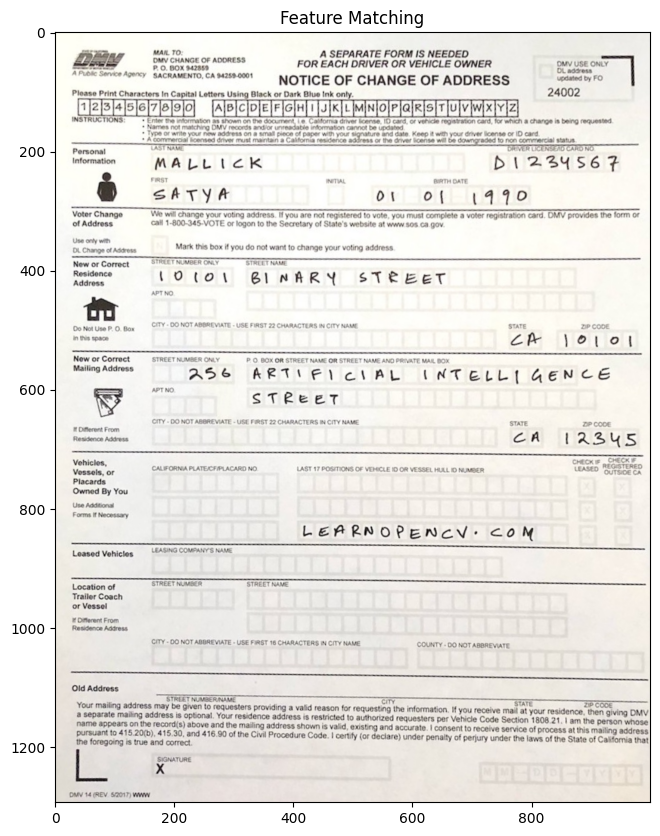

In [107]:
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(im2Reg, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching')
plt.show()
